# House Pricing from Boston dataset

In [58]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [8]:
boston = load_boston()

In [37]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target.ravel()

In [12]:
X.shape

(506, 13)

In [13]:
y.shape

(506,)

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [17]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

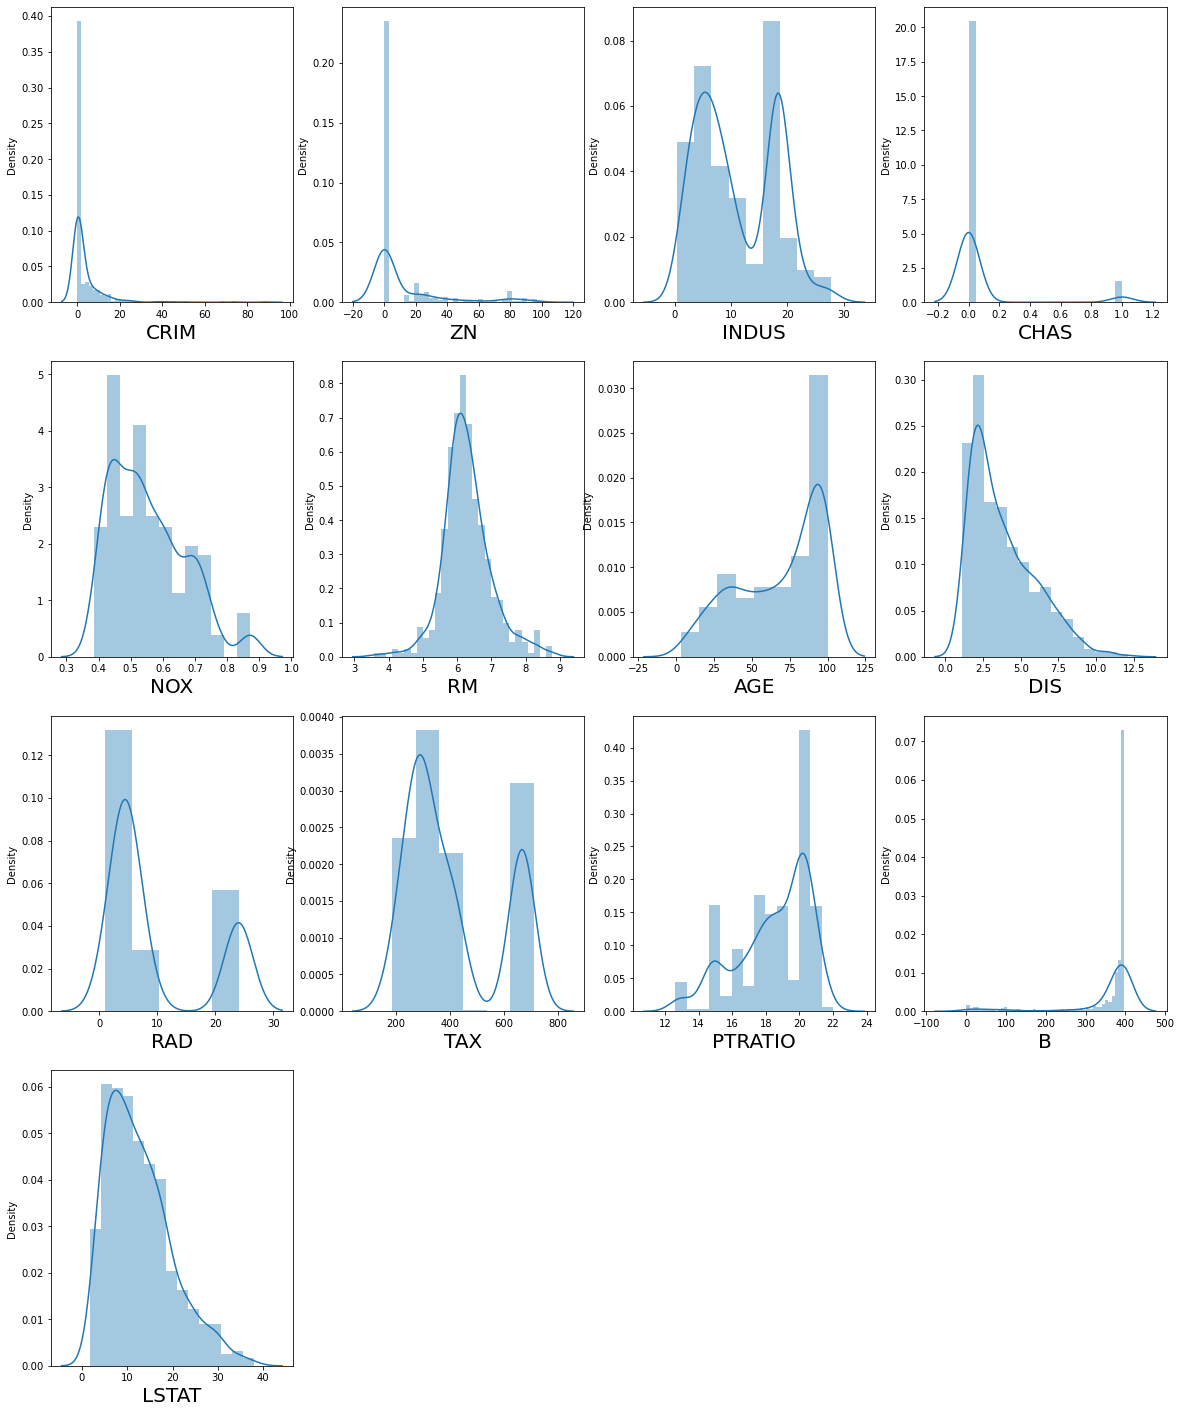

In [25]:
plt.figure(figsize=(20,25))
count = 1           
for c in X:
    if count <= 14:
        ax = plt.subplot(4,4,count)
        sns.distplot(X[c])
        plt.xlabel(c,fontsize=20)
    count+=1

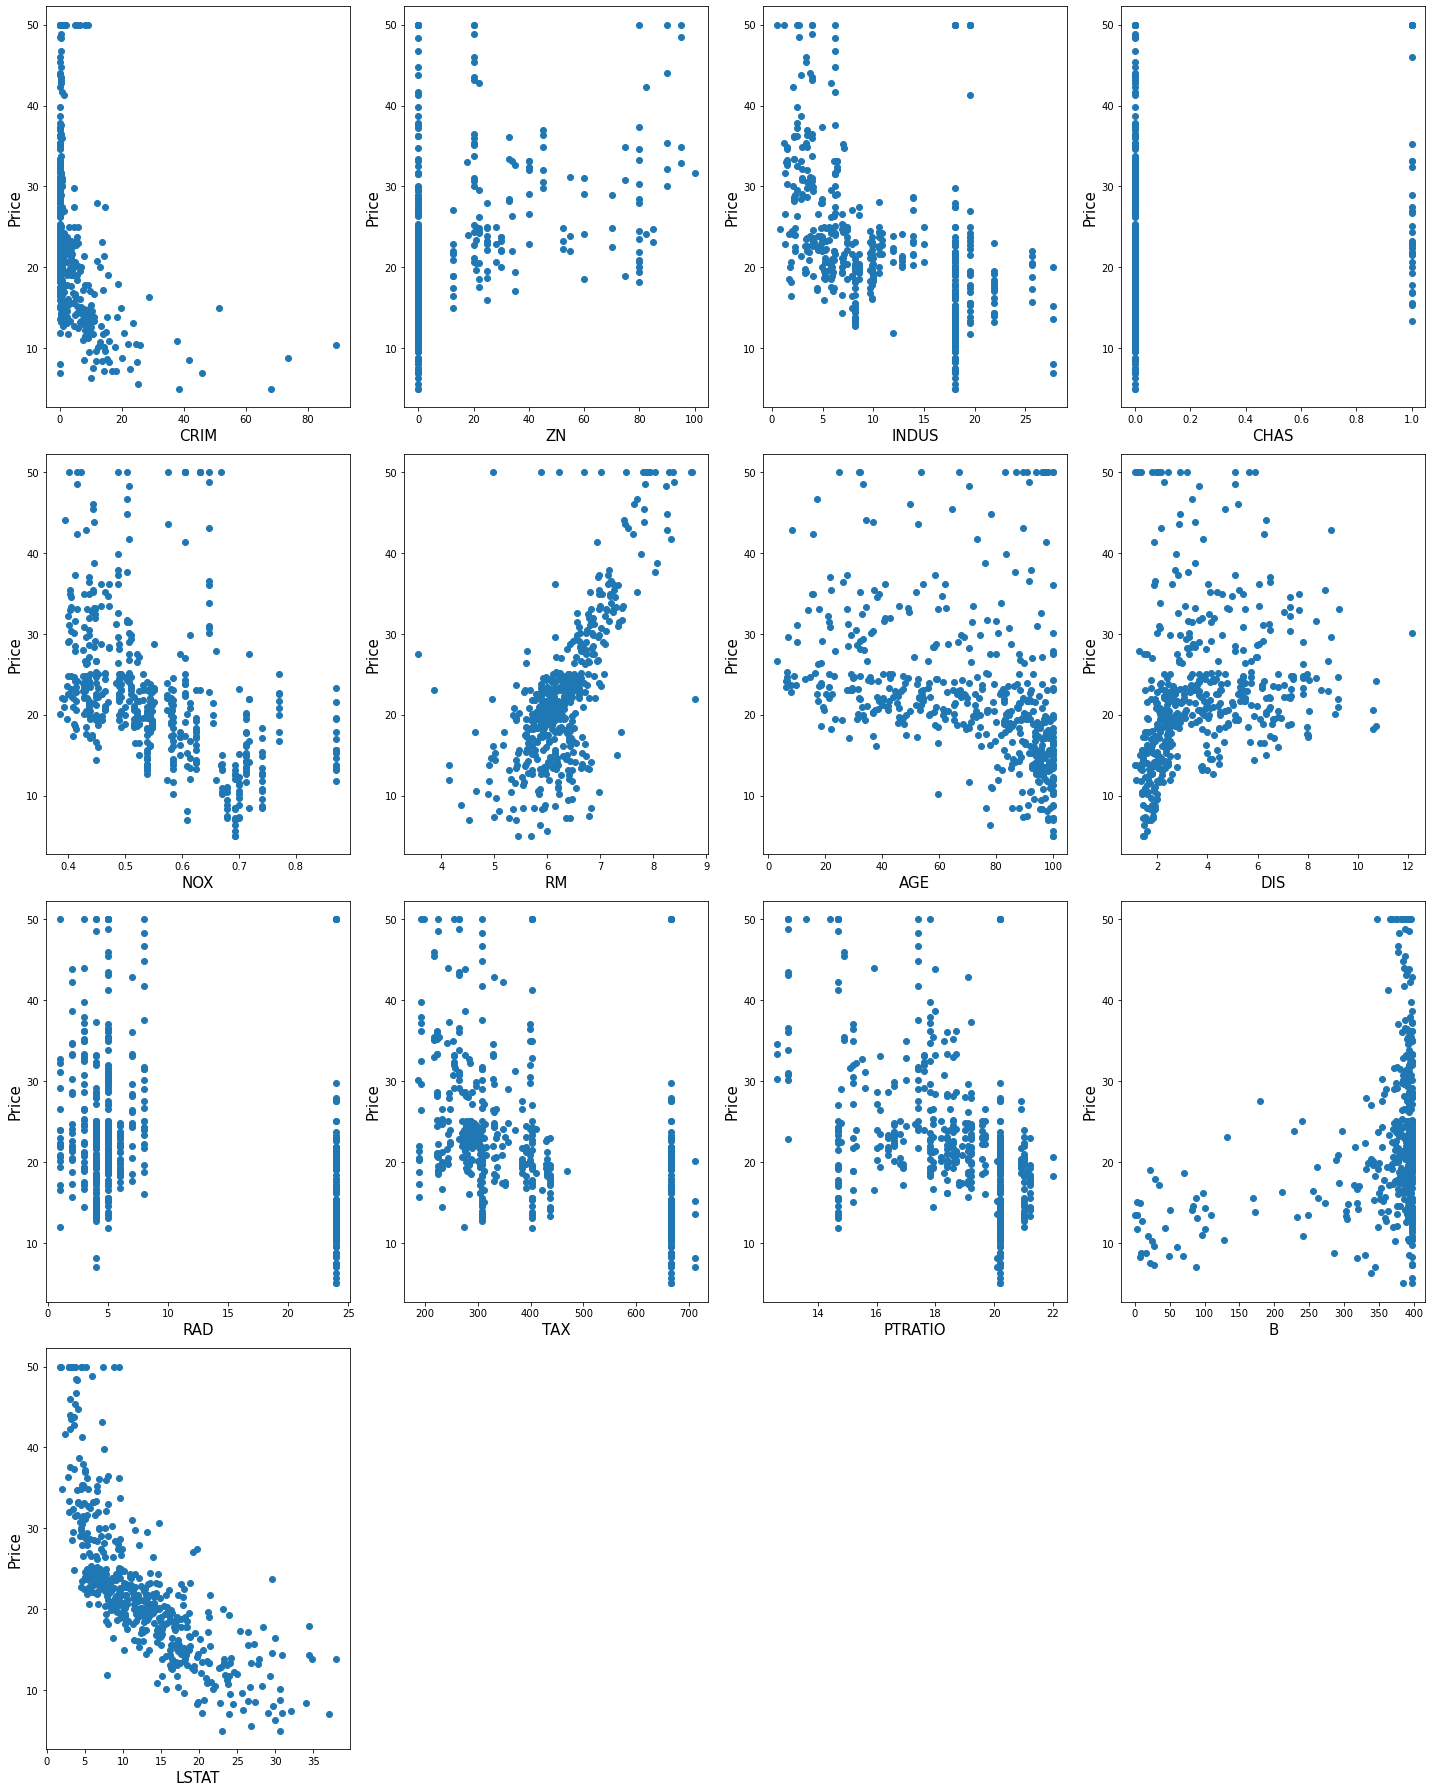

In [27]:
plt.figure(figsize=(20,25))
plotcount = 1

for column in X:
    if plotcount <= 15:
        ax = plt.subplot(4,4,plotcount)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Price',fontsize=15)
    plotcount+=1
plt.tight_layout()

In [30]:
sc = StandardScaler()

In [31]:
X_scaled = sc.fit_transform(X)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [39]:
Rfr =RandomForestRegressor(n_estimators = 10, random_state = 0)

In [41]:
Rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [44]:
print("Score on train set:",Rfr.score(x_train,y_train))
print("Score on test set:",Rfr.score(x_test,y_test))

Score on train set: 0.9761427827393037
Score on test set: 0.8792967872765995


In [45]:
Rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [52]:
grid_param={
    'max_depth':range(2,10),
    'max_features':['auto','log2'],
    'n_estimators':[50,100,150,200,250,300,400],
    'max_samples':[0.2,0.4,0.6,0.8],
    'criterion': ['mse', 'mae']
}

In [53]:
grid_search=GridSearchCV(Rfr,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [54]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2080 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3904 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4480 out of 4480 | elapsed: 11.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 10),
                         'max_features': ['auto', 'log2'],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 400]},
             verbose=3)

In [55]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'max_samples': 0.8,
 'n_estimators': 100}

In [56]:
grid_search.best_score_

0.8474300805018977

In [59]:
score_before_tuning=cross_val_score(Rfr,x_train,y_train,cv=5).mean()
score_before_tuning

0.8339781789691987

In [60]:
Rfr_tuned=RandomForestRegressor(max_depth=9,max_features='auto',max_samples=0.8,n_estimators=100,oob_score=True,criterion='mse',random_state=35)

In [61]:
Rfr_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_samples=0.8, oob_score=True,
                      random_state=35)

In [62]:
Rfr_tuned.oob_score_

0.8533380668911563

In [63]:
score_after_tuning=cross_val_score(Rfr_tuned,x_train,y_train,cv=5).mean()
score_after_tuning

0.8462752403337449

In [64]:
test_score_before_tuning=Rfr.score(x_test,y_test)
test_score_before_tuning

0.8792967872765995

In [65]:
test_score_after_tuning=Rfr_tuned.score(x_test,y_test)
test_score_after_tuning

0.8967970656417511